### scikit-learn으로 모델링하는 순서를 기억하자!!

### 1. 데이터 가져오기
Scikit-learn에는 Toy Dataset이 내장되어 있습니다.

그중에서 iris 데이터를 가져와보겠습니다.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
iris

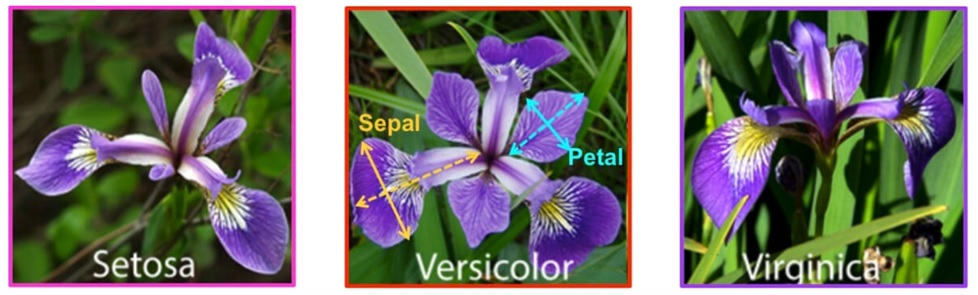

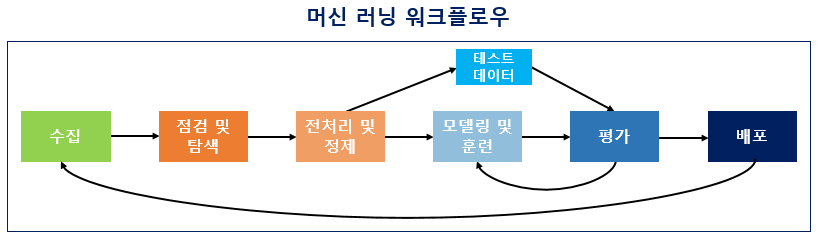

In [ ]:
# sklearn의 toy Dataset을 다룰때 DESCR로 데이터의 설명을 볼 수 있다.
print(iris['DESCR'])

In [ ]:
# X data
data = iris['data']
# numpy 0:5
data[0:5] # numpy array

In [ ]:
# Y data
target =iris['target']
target

In [ ]:
# cloumns
column = iris['feature_names']
column

### 데이터프레임 만들기

In [ ]:
df = pd.DataFrame(data=data, columns=column)
df.head()

In [ ]:
# target컬럼을 추가
df['target'] = target
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
# df중에 숫자형 데이터를 선택하여 통계치를 보여준다.
df.describe()

### 탐색적 데이터 분석(EDA)

In [ ]:
# 데이터를 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 컬럼의 이름을 간단하게 변경 '(cm)'삭제
df.columns = ['sepal length', 'sepal width', 'petal length','petal width', 'target']
df.head()

In [ ]:
# seaborn은 matplotlib을 기반으로한 코드를 간단하게 데이터 시각화 라이브러리
# 데이터프레임을 전달하고
sns.scatterplot(x=df.columns[1], y=df.columns[0], data=df, hue=df.target, palette='muted')
plt.show()

In [ ]:
sns.scatterplot(x=df.columns[3], y=df.columns[2], data=df, hue=df.target, palette='muted')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

# 1. Iris 데이터 로드 및 DataFrame 생성
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 2. 그래프 설정 및 PCA
fig = plt.figure(figsize=(8, 6))

# 수정된 부분: Axes3D 객체 생성 방식을 add_subplot으로 변경
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(df.drop('target', axis=1))

# 3. 산점도 그리기
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("Iris 3D PCA")
ax.set_xlabel("1st")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd")
ax.zaxis.set_ticklabels([])

plt.show()

### 데이터 전처리 (모델링을 위한)

In [ ]:
df.head()

In [ ]:
df.drop('target', axis=1)

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
# 순서는 X=df.drop('target', axis=1), y=df['target']
# train:test 분할 비율 0.8:0.2
# stratify는 레이블(정답)을 참조해서 train과 test의 비율을 유지
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=37, stratify=df['target'])
#X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, stratify=df['target'])

X_train[:5], X_test[:5]

In [ ]:
# y_train중에서 0,1,2의 갯수 세기
y_train.value_counts()

### 모델을 학습, 예측

In [ ]:
# runModel = 'Logistic'
# runModel = 'SVC'
# runModel = 'Tree'
runModel = 'RF'

In [ ]:
from sklearn.metrics import accuracy_score

### iris 데이터셋이 분류 문제이므로 분류 알고리즘을 사용

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

if runModel=='Logistic':
    # 1. 모델 생성(선언)
    model = LogisticRegression()

    # 2. 모델 학습 (학습용 데이터)
    model.fit(X_train, y_train)

    # 3. 모델 예측
    y_pred = model.predict(X_test)

    # 4. 모델 평가 : 정확도 = 맞춘 것의 갯수 / 테스트 전체
    F1Score = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)

In [ ]:
# SVC으로 모델링 SVC:Support Vector Classification
from sklearn.svm import SVC

if runModel=='SVC':
    # 1. 모델 생성(선언)
    model = SVC()

    # 2. 모델 학습 (학습용 데이터)
    model.fit(X_train, y_train)

    # 3. 모델 예측
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)

In [ ]:
# Decision Tree로 모델링
from sklearn.tree import DecisionTreeClassifier

if runModel=='Tree':
    # 1. 모델 생성(선언)
    model = DecisionTreeClassifier()

    # 2. 모델 학습 (학습용 데이터)
    model.fit(X_train, y_train)

    # 3. 모델 예측
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# 그래프 크기 설정
plt.figure(figsize=(12, 8))
# 트리 시각화
plot_tree(model, 
          filled=True,                   # 노드 색칠 여부
          feature_names=iris.feature_names, # 특성 이름 (sepal length 등)
          class_names=iris.target_names,    # 클래스 이름 (setosa 등)
          rounded=True)                  # 노드 모서리 둥글게
plt.show()


In [ ]:
X_test.shape, y_test.shape

In [ ]:
y_pred

In [ ]:
# 채점 y_test데이터를 사용해서 모델의 정확도를 평가
(y_pred == y_test).mean()

In [ ]:
# scikit-learn의 함수를 이용해서 모델의 정확도를 평가
# metrics 라는 용어는 머신러닝에서 '평가 지표'의 의미로 사용
# accuracy_score : 정확도를 평가하는 함수 (예 100개중에 95를 맞췄다. 95%정확도)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

In [ ]:
# Random Forest로 모델링
from sklearn.ensemble import RandomForestClassifier

if runModel=='RF':
    # 1. 모델 생성(선언)
    model = RandomForestClassifier(n_estimators=10)

    # 2. 모델 학습 (학습용 데이터)
    model.fit(X_train, y_train)

    # 3. 모델 예측
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)

In [ ]:
# 내 컴퓨터에서 CPU 코어수를 확인
import os
import multiprocessing

# 방법 1: os 모듈 사용 (가장 간단)
# 논리 프로세서(스레드) 수를 포함한 전체 코어 수를 반환합니다.
n_cores_os = os.cpu_count()
print(f"CPU 코어 수 (os.cpu_count): {n_cores_os}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 1. 모델 생성 (기본 모델)
# random_state는 결과 재현을 위해 고정했습니다.
model = RandomForestClassifier(random_state=42)

# 2. 탐색할 하이퍼파라미터 그리드 설정
# n_estimators: 10, 20, 30, 40, 50
params = {
    'n_estimators': range(10, 101, 10)
}

# 3. GridSearchCV 객체 생성
# cv=5: 5-Fold 교차 검증 사용
# refit=True: 최적의 파라미터를 찾은 후 해당 파라미터로 전체 학습 데이터에 대해 재학습
# sklearn에서 n_jobs=-1 : 모든 CPU 코어를 사용하여 병렬 처리
grid_cv = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy')

# 4. 모델 학습 (Grid Search 수행)
grid_cv.fit(X_train, y_train)

# 5. 최적 파라미터 및 결과 출력
print(f"최적 하이퍼파라미터: {grid_cv.best_params_}")
print(f"최고 예측 정확도: {grid_cv.best_score_:.4f}")

# 6. 최적의 모델로 테스트 데이터 예측 및 평가
best_rf = grid_cv.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"테스트 세트 정확도 (Best Estimator): {accuracy:.4f}")

#### KNN(K - Nearest Neighbors)

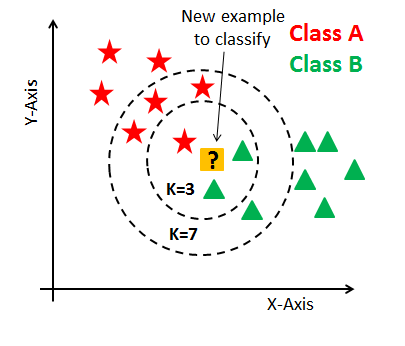

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 1. 모델 설정
model = KNeighborsClassifier(n_neighbors=5)

# 2. 모델 학습
model.fit(X_train, y_train)

# 3. 모델 예측
y_pred = model.predict(X_test)

# 4. 모델 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

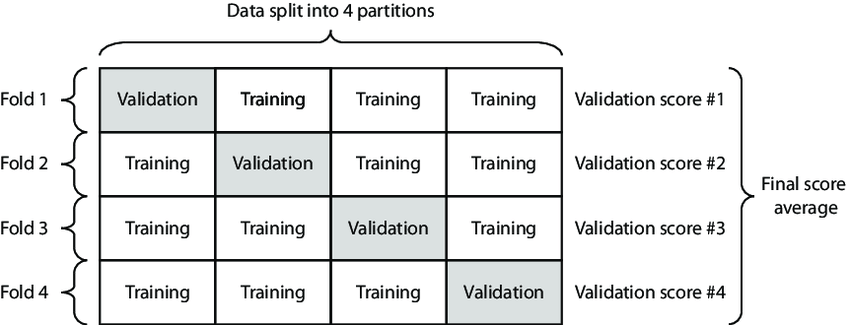

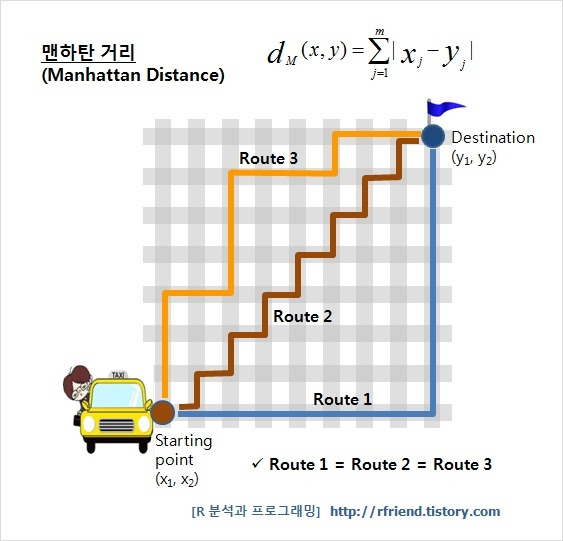

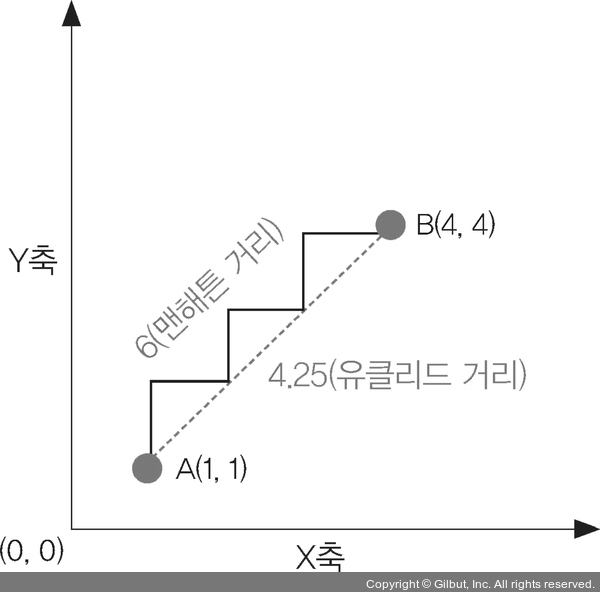

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# KNC 모델을 GridSearchCV로 최적화

# 1. 모델 생성
knc = KNeighborsClassifier()

# 2. GridSearchCV 설정
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    #'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# n_jobs=-1 : 모든 CPU 코어 사용
# 하이퍼 파라메터의 모든 경우의 모델 + cross validation
grid_search = GridSearchCV(knc, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# 3. 모델 학습
grid_search.fit(X_train, y_train)

# 4. 최적 모델 선택
best_model = grid_search.best_estimator_

print(f"최적 하이퍼파라미터: {grid_search.best_params_}")
print(f"최고 예측 정확도: {grid_search.best_score_:.4f}")


# 5. 모델 평가
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy:.4f}')

In [ ]:
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df

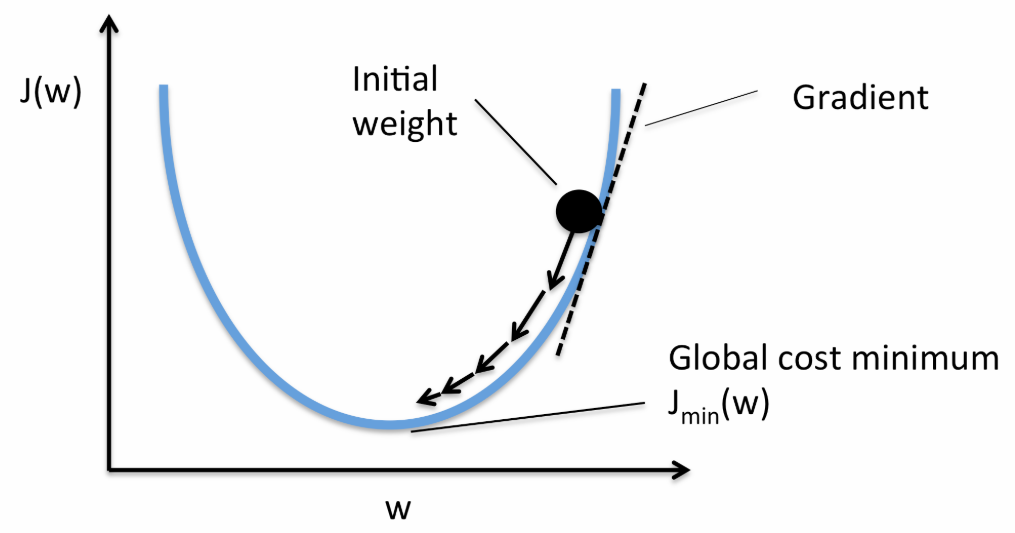

#### SGD Classifier

Stochastic과 반대되는 단어 : Deterministic(결정론적)

Stochastic Gradient Descent (SGD) : 확률적 경사하강법

SGD Classifier(랜덤하게 샘플링해서 파라메터를 최적화하는 분류 학습 알고리즘)

In [ ]:
from sklearn.linear_model import SGDClassifier

# SGD Classifier로 분류기 학습

# 1. 모델 선언
# random_state는 랜덤 시드를 고정하여 결과를 재현할 수 있도록 합니다.
sgd = SGDClassifier(random_state=41)

# 2. 모델 학습
sgd.fit(X_train, y_train)

# 3. 모델 예측
y_pred = sgd.predict(X_test)

# 4. 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))

#### 하이퍼-파라메터
* 파라메터: 모델이 학습하는 동안 튜닝이되는 대상 

$y=wx+b$  
w, b가 파라메터
* 하이퍼 파라메터: 파라메터를 튜닝하는데 영향을 주는 모델 외부의 파라메터

In [ ]:
# penalty와 max_iter는 하이퍼 파라메터로 볼 수 있다.
# penalty는 오버피팅을 방지하기 위한 정규화 방법
# max_iter는 최적화를 위한 반복 횟수
sgd = SGDClassifier(random_state=41, penalty='l1', max_iter=1000, n_jobs=-1)

# 2. 모델 학습
sgd.fit(X_train, y_train)

# 3. 모델 예측
y_pred = sgd.predict(X_test)

# 4. 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))

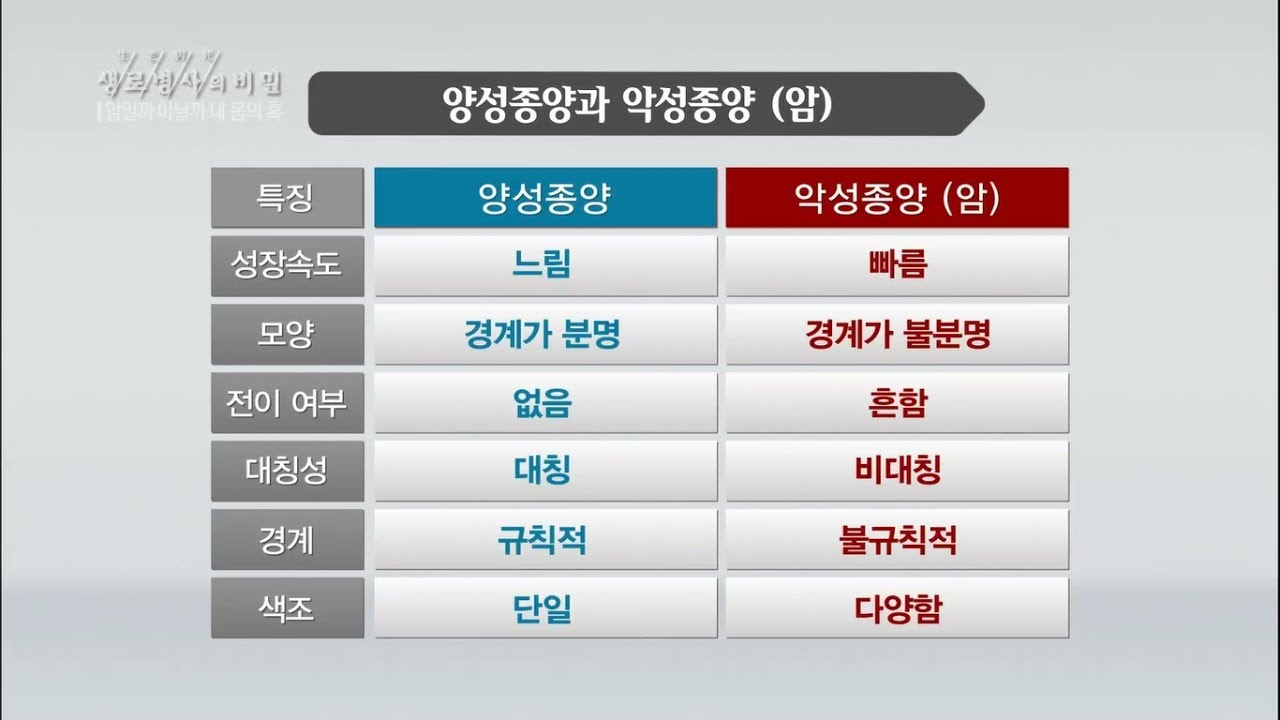

#### breast Cancer 데이터셋 가져오기

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)

In [ ]:
data = cancer['data']
target = cancer['target']
feature_name = cancer['feature_names']

In [ ]:
# 데이터 프레임을 생성
df = pd.DataFrame(data=data, columns=feature_name)
df.head()

In [ ]:
df.info()

In [ ]:
df['target'] = target
# target값이 1이면 양성, 0이면 악성
df.head()

In [ ]:
# 양성만 선택(boolean indexing)
pos = df.loc[df['target']==1]

# 악성만 선택
neg = df.loc[df['target']==0]

In [ ]:
# 클래스 균형이 좋으면 성능이 좋음 (5:5)
# 클래스 균형이 좋지 않으면 성능이 좋지 않음
len(pos), len(neg)

#### 원본 데이터는 357:212
가공된 데이터는 양성 357 + 음성 5

인위적으로 데이터의 균형이 좋지 않은 상황을 만들기 위해 

sample = pd.concat(pos, neg[:5]) 정확도와

원본 데이터의 정확도를 비교

In [ ]:
neg[:5]

In [ ]:
pos

In [ ]:
sample.info()

In [ ]:
# 양성 357 + 악성 212
sample = pd.concat([pos, neg])
sample.head()

In [ ]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', axis=1), sample['target'], test_size=0.2, random_state=42)
x_train.shape, x_test.shape

In [ ]:
y_train.value_counts()

In [ ]:
# 이 데이터셋을 LogisticRegression으로 학습시킨다.ArithmeticError

# 1. 모델 생성
model = LogisticRegression(max_iter=6000)

# 2. 모델 학습
model.fit(x_train, y_train)

# 3. 모델 예측
y_pred = model.predict(x_test)

# 4. 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
y_test.value_counts()

In [ ]:
# 클래스 분류의 정확도를 판단하는 기준 4가지

# 1. 정확도(Accuracy)
# 2. 정밀도(Precision)
# 3. 재현율(Recall)
# 4. F1 Score

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', )
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

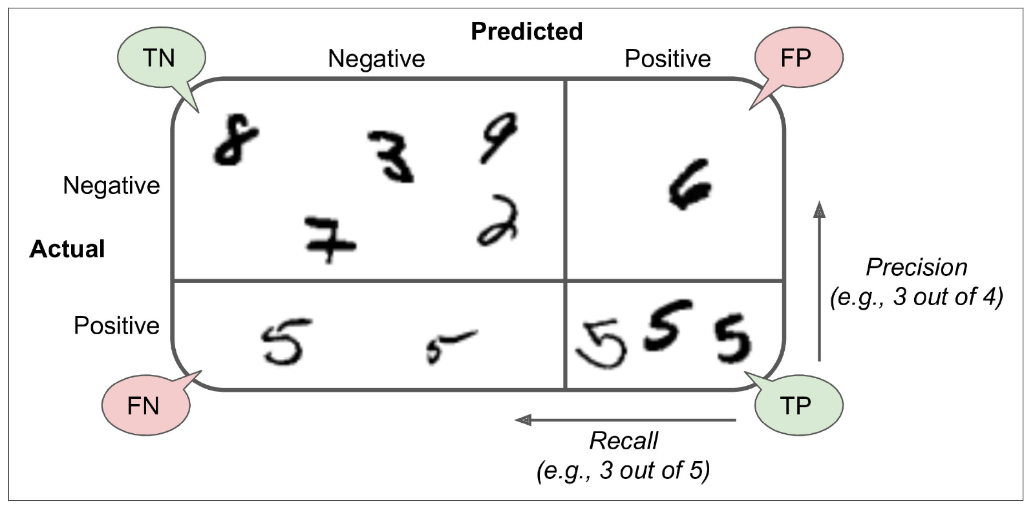

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 정확도(Accuracy)   TN+TP/TN+TP+FN+FP = 107/114   
accuracy = accuracy_score(y_test, y_pred)

# 정밀도(Precision) : 예측을 잘한 양성 샘플의 비율
# TP / (TP + FP) : 예측을 True로 예측한 것 중에 실제가 True인 것의 비율
precision = precision_score(y_test, y_pred)

# 재현율(Recall) : 정확하게 감지한 양성 샘플의 비율
# TP / (TP + FN) : 실제가 True인 것 중에 예측을 True로 예측한 것의 비율
recall = recall_score(y_test, y_pred)

# F1-score : 정밀도와 재현율의 조화평균
# 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

In [ ]:
TP / (TP + FP) : 예측을 True로 예측한 것 중에 실제가 True인 것의 비율